In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# === CONFIG ===
VOC_ROOT = '/Users/chiaracangelosi/Desktop/VOCdevkit/VOC2012/' 
IMAGE_IDS = ['2007_000243', '2007_001834', '2007_002619', '2007_002212', '2007_006277']  # immagini semplici

In [3]:
# === FUNZIONI DI CARICAMENTO ===

def load_images(image_ids, voc_root):
    """Carica le immagini RGB."""
    images = []
    for image_id in image_ids:
        img_path = os.path.join(voc_root, 'JPEGImages', image_id + '.jpg')
        img = Image.open(img_path).convert('RGB')
        images.append(np.array(img))
    return images

def load_semantic_masks(image_ids, voc_root):
    """Carica le maschere di segmentazione per classe."""
    masks = []
    for image_id in image_ids:
        mask_path = os.path.join(voc_root, 'SegmentationClass', image_id + '.png')
        mask = Image.open(mask_path)
        masks.append(np.array(mask))
    return masks

def load_instance_masks(image_ids, voc_root):
    """Carica le maschere di segmentazione per oggetto."""
    instance_masks = []
    for image_id in image_ids:
        mask_path = os.path.join(voc_root, 'SegmentationObject', image_id + '.png')
        mask = Image.open(mask_path)
        instance_masks.append(np.array(mask))
    return instance_masks

In [4]:
# === ESECUZIONE ===

# Caricamento dati
images = load_images(IMAGE_IDS, VOC_ROOT)
semantic_masks = load_semantic_masks(IMAGE_IDS, VOC_ROOT)
instance_masks = load_instance_masks(IMAGE_IDS, VOC_ROOT)

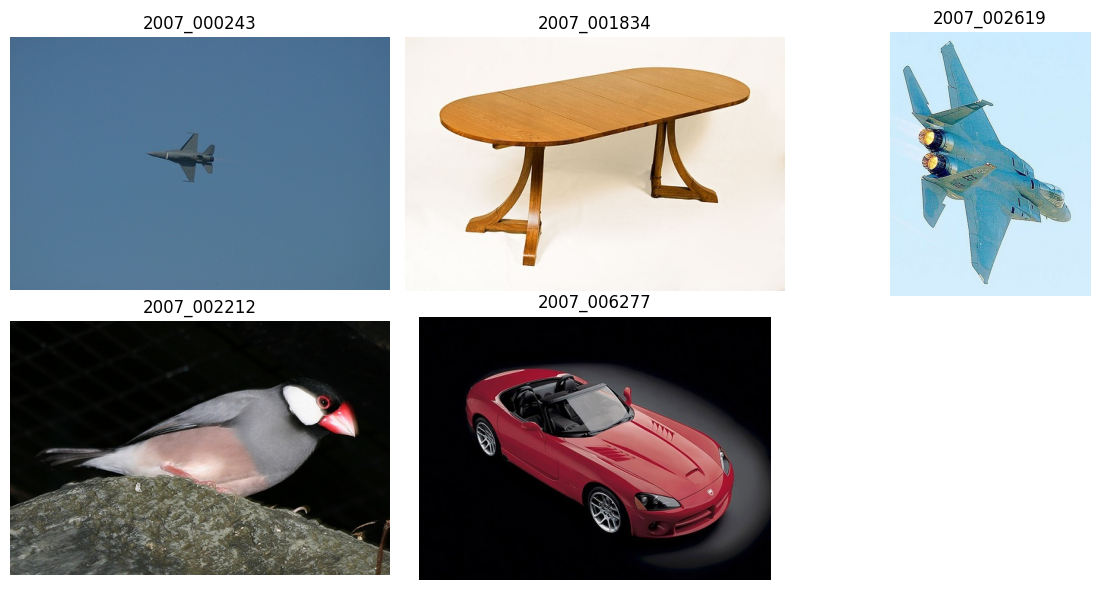

In [5]:
import matplotlib.pyplot as plt

def show_images(images, image_ids=None, n_cols=3, figsize=(12, 6)):
    n_images = len(images)
    n_rows = (n_images + n_cols - 1) // n_cols

    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        title = image_ids[i] if image_ids else f"Image {i}"
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Esempio di utilizzo:
show_images(images, image_ids=IMAGE_IDS)